In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [3]:
# data for Unemporizations from all hurricanes

Unemp_sandy = "./CleanEconData/Sandy_cln_unemployment.csv"
Unemp_sandy_df = pd.read_csv(Unemp_sandy)
Unemp_sandy_df = Unemp_sandy_df[['Location','Hurricane','Unemployment','Delta','Unemployment Month']]

Unemp_rita = "./CleanEconData/rita_cln_unemployment.csv"
Unemp_rita_df = pd.read_csv(Unemp_rita)
Unemp_rita_df = Unemp_rita_df[['Location','Hurricane','Unemployment','Delta','Unemployment Month']]

Unemp_katrina = "./CleanEconData/katrina_cln_unemployment.csv"
Unemp_katrina_df = pd.read_csv(Unemp_katrina)
Unemp_katrina_df = Unemp_katrina_df[['Location','Hurricane','Unemployment','Delta','Unemployment Month']]

Unemp_ike = "./CleanEconData/Ike_cln_unemployment.csv"
Unemp_ike_df = pd.read_csv(Unemp_ike)
Unemp_ike_df = Unemp_ike_df[['Location','Hurricane','Unemployment','Delta','Unemployment Month']]

Unemp_ivan = "./CleanEconData/Ivan_cln_unemployment.csv"
Unemp_ivan_df = pd.read_csv(Unemp_ivan)
Unemp_ivan_df = Unemp_ivan_df[['Location','Hurricane','Unemployment','Delta', 'Unemployment Month']]

print(Unemp_katrina_df)

                   Location Hurricane  Unemployment  Delta  Unemployment Month
0    New Orleans Metro Area   Katrina           5.0     -4                   1
1    New Orleans Metro Area   Katrina           5.0     -4                   2
2    New Orleans Metro Area   Katrina           5.0     -4                   3
3    New Orleans Metro Area   Katrina           5.0     -4                   4
4    New Orleans Metro Area   Katrina           5.0     -4                   5
..                      ...       ...           ...    ...                 ...
246  New Orleans Metro Area   Katrina           7.1     15                   7
247  New Orleans Metro Area   Katrina           6.9     15                   8
248  New Orleans Metro Area   Katrina           6.8     16                   9
249  New Orleans Metro Area   Katrina           5.5     16                  10
250  New Orleans Metro Area   Katrina           5.3     16                  11

[251 rows x 5 columns]


In [4]:
#merge on Delta with value between -4 and 10

Unemp_merge_df = pd.concat([Unemp_sandy_df,Unemp_katrina_df,Unemp_ike_df,Unemp_ivan_df,Unemp_rita_df ])

Unemp_merge_df = Unemp_merge_df[Unemp_merge_df['Delta'].between(-4,7)]

Unemp_merge_df.reset_index(level=0, inplace=True)

Unemp_merge_df['Delta'] = (Unemp_merge_df['Delta'].astype(str) + "." + Unemp_merge_df['Unemployment Month'].astype(str))

Unemp_merge_df['Delta'] = Unemp_merge_df['Delta'].astype(float)

Unemp_merge_df.head()
print(Unemp_merge_df)
# print(Unemp_merge_df.columns.tolist())

     index      Location Hurricane  Unemployment  Delta  Unemployment Month
0        0  Cape May, NJ     Sandy          11.9   -4.1                   1
1        1  Cape May, NJ     Sandy          11.3   -4.2                   2
2        2  Cape May, NJ     Sandy          10.6   -4.3                   3
3        3  Cape May, NJ     Sandy           8.2   -4.4                   4
4        4  Cape May, NJ     Sandy           6.5   -4.5                   5
..     ...           ...       ...           ...    ...                 ...
751    148  Houston Area      Rita           6.1    7.5                   5
752    149  Houston Area      Rita           6.6    7.6                   6
753    150  Houston Area      Rita           6.5    7.7                   7
754    151  Houston Area      Rita           6.2    7.8                   8
755    152  Houston Area      Rita           6.1    7.9                   9

[756 rows x 6 columns]


In [6]:
Unemp_merge_df=Unemp_merge_df.pivot_table( values =['Unemployment'], index=['Delta'], columns='Hurricane').reset_index()
# auth_merge_df.dropna()
# auth_merge_df.head()


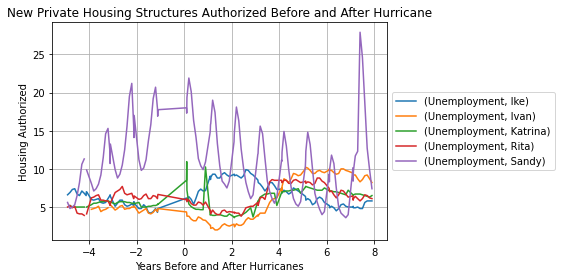

In [8]:
Unemp_merge_df.plot(x = 'Delta')
plt.title('New Private Housing Structures Authorized Before and After Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Housing Authorized')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.savefig('./Graphs/HousingAuthGraph.png')
